In [1]:
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

## Obtaining The Light Curve File

In [2]:
# For the purposes of this tutorial, we just know the MAST URL location of the file we want to examine.
fits_file = "https://archive.stsci.edu/missions/tess/tid/s0001/0000/0000/2515/5310/tess2018206045859-s0001-0000000025155310-0120-s_lc.fits"

## Understanding The Light Curve FITS File Structure

In [4]:
fits.info(fits_file)

Filename: /home/jdowzell/.astropy/cache/download/py3/965b2ad4aa34630130f09303aee051a0
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   20076R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


(ext = ? Not "No." in fits)

In [55]:
fits.getdata(fits_file, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

This gives us a detailed list of all of the columns, what they are called, the data types used in them, and their units.

I am not sure what "disp" means - likely some form of display parameter, perhaps to dictate the length of each display? (normalise them so they all show the same number of digits, such as 000.00)

## Reading the timestamps and fluxes

In [56]:
with fits.open(fits_file, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

/home/jdowzell/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jdowzell/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2008., 2007., 2008., 2007., 1494., 1706., 2008., 2007., 2008.,
        2008.]),
 array([1325.29525977, 1328.08346702, 1330.87167427, 1333.65988153,
        1336.44808878, 1339.23629603, 1342.02450329, 1344.81271054,
        1347.60091779, 1350.38912504, 1353.1773323 ]),
 <a list of 10 Patch objects>)

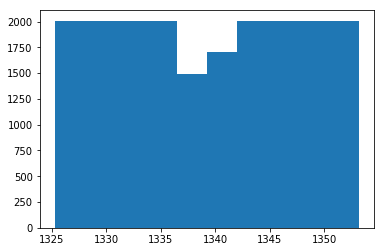

In [67]:
plt.hist(tess_bjds)


## Plot the light curve

(woohoo!)

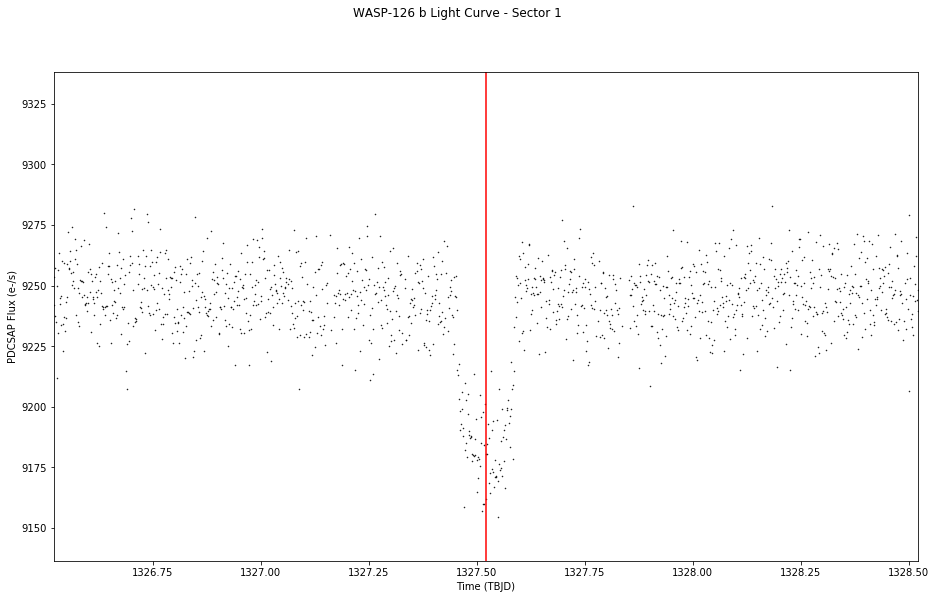

In [73]:
# Define the epoch of primary transit in TBJD.  Our timestamps are also already in TBJD.
t0 = 1327.520678

# Start figure and axis.
fig, ax = plt.subplots(figsize=(16,9))

# Plot the timeseries in black circles.
ax.plot(tess_bjds, pdcsap_fluxes, 'k.', markersize=1)

# Center the x-axis on where we expect a transit to be (time = T0), and set
# the x-axis range within +/- 1 day of T0.
ax.set_xlim(t0 - 1.0, t0 + 1.0)

# Overplot a red vertical line that should be where the transit occurs.
ax.axvline(x=t0, color="red")

# Let's label the axes and define a title for the figure.
fig.suptitle("WASP-126 b Light Curve - Sector 1")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")

# Adjust the left margin so the y-axis label shows up.
plt.subplots_adjust(left=0.15)
#plt.figure(figsize=(2,8))
plt.show()

This is nice, but it's... small. Let's make it bigger!

In [21]:
from matplotlib.pyplot import figure
# Changed the following code above:
# fig, ax = plt.subplots() > fig, ax = plt.subplots(figsize=(16,9))

It worked!

## Understanding Light Curve Flags

In [32]:
# First we need to read in the array of cadence quality flags, let's do
# that now.
with fits.open(fits_file, mode="readonly") as hdulist:
    qual_flags = hdulist[1].data['QUALITY']

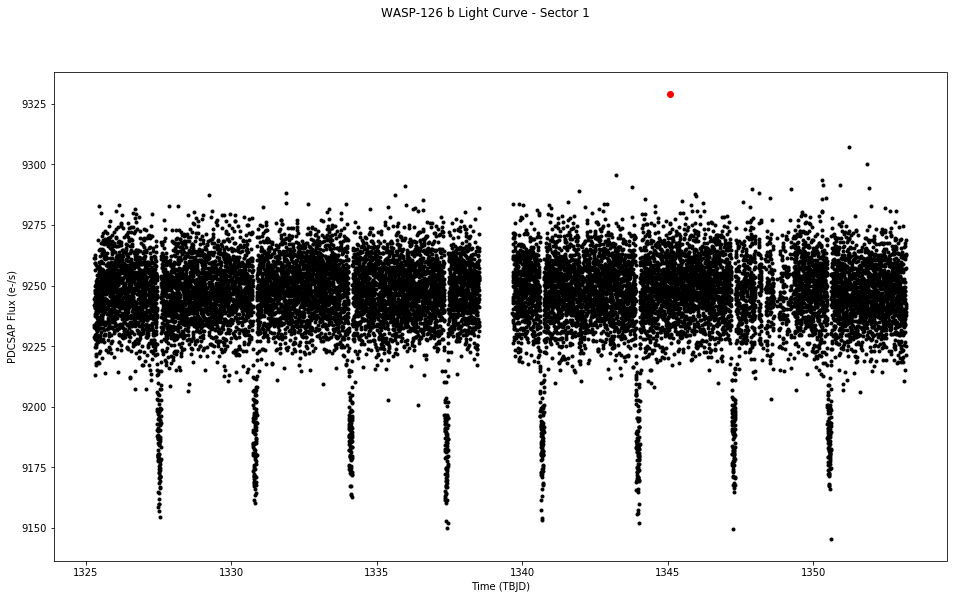

In [74]:
# Start figure and axis.
fig, ax = plt.subplots(figsize=(16,9))

# Plot the timeseries in black circles.
ax.plot(tess_bjds, pdcsap_fluxes, 'k.')

# Locate quality flags greater than zero.
where_gt0 = np.where(qual_flags > 0)[0]

# Overplot the fluxes with quality flags greater than zero in red.
ax.plot(tess_bjds[where_gt0], pdcsap_fluxes[where_gt0], 'ro')

# Let's label the axes and define a title for the figure.
fig.suptitle("WASP-126 b Light Curve - Sector 1")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")
plt.show()

Plots in red are where the "quality" flag is set to greater than zero

I do not pretend to understand whatall the flags mean, but there is a section about what each flag is, and what they mean, located here: https://outerspace.stsci.edu/display/TESS/2.0+-+Data+Product+Overview#id-2.0-DataProductOverview-Table:CadenceQualityFlags

In [42]:
#!pip install astroquery
#!pip install boto3
from astroquery.mast import Observations
import boto3